I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import random
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
import hepstats
from hepstats import *
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from data_exploration_functions import *
from data_extraction_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[1],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', index=1, options=('All', 'Bona'), value='Bona')

II. Load Data

In [2]:
from matplotlib.colors import LogNorm
from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')

df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

#print("ObsID and RegID: ", df_eventfiles_group.groups.keys())

Number of Eventfiles:  82283
Number of Property Sets:  82283


Exploratory

In [14]:
# name_id = 'J2' #'J234503.4−423841' # '2CXO J050706.7−315210' '2CXO J010344.5−214845'
obs_id =  [16453]
name_id = 'J'

# result = df_properties_global[(df_properties_global['name'].str.contains(name_id)) & (df_properties_global['obsreg_id'].str.startswith(obs_id))]
result = df_properties_global[(df_properties_global['obsid'].isin(obs_id))]
result = result[(result['name'].str.contains(name_id))]

result.head(100)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id


Select

In [8]:
all_ids = list(df_eventfiles_group.groups.keys())
# all_names = list(df_properties_global['name'])
flares = ['4395_992','16444_1025','2227_220','9518_47','9109_333','9109_344','13637_1078','14368_489','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','1042_24']
dips = ['10783_10','10871_10','11059_10','9070_10','9072_10','13814_567','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86']
newfound = ['10346_11','10542_331','10545_496','10556_5752','10556_6687','10811_223','10821_241', '1878_331','10930_1050','10953_275','10956_64']
somename = ['10542_331','10545_338','10544_380']
select = ['10783_10', '14368_489']
tsne = ['11176_73','11390_136','12301_42']
#####SELECTED ANOMALIES
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
rosanne = ['13814_567']
lin = ['4062_31', '13454_56']
irwin = ['3926_13','7800_4','7799_16','8490_30']
######
filtered_ids = [id for id in all_ids if id.split('_')[1] == '2']
ran = random.randint(0, 80000)
random_ids = all_ids[ran:ran+10]
# filtered_name = [name for name in all_names if name == '2CXO J095700.2+693419']
keep = dips + flares
keep = rosanne + lin + irwin
keep = ['4395_2680','4567_200','4396_114','4395_1800']
keep = lin + irwin
# keep = filtered_ids
# name = ['2CXO J122829.7+014147']
# name = ['2CXO J234503.4−423841', '2CXO J050706.7−315210', '2CXO J010344.5−214845']
#keep_obsreg = ['10995_21','13814_567']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(keep)]
# df_properties_anomalies = df_properties_global[df_properties_global['name'].isin(name)]
df_properties_anomalies.head(50)

# 1712_91

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
11304,2CXO J010344.5-214845,15.935591,-21.812720,1.103559,0.934452,49.882527,7.855560,TRUE,False,False,...,-0.136790,1.000000,1.000000,1.000000,1.000000,10.0,NaN,91786.521093,ACIS-3,13454_56
27306,2CXO J050706.7-315211,76.778163,-31.869803,1.561908,1.322285,164.925440,16.890480,TRUE,False,False,...,-0.101811,1.000000,1.000000,1.000000,1.000000,10.0,NaN,46150.519414,ACIS-8,4062_31
68749,2CXO J124251.4+023836,190.714419,2.643422,0.756728,0.722542,152.630383,14.204387,TRUE,False,False,...,0.029357,0.999965,0.997535,0.937778,0.923634,8.0,NaN,74700.067401,ACIS-3,3926_13
73490,2CXO J132552.7-430546,201.469789,-43.096237,0.736502,0.723039,171.612997,10.028475,TRUE,False,False,...,0.440350,1.000000,0.998576,0.999043,NaN,9.0,NaN,90836.184787,ACIS-0,7800_4
73491,2CXO J132552.7-430546,201.469789,-43.096237,0.736502,0.723039,171.612997,10.028475,TRUE,False,False,...,0.521549,1.000000,0.999966,0.994850,0.993572,9.0,NaN,94776.912686,ACIS-1,7799_16
73495,2CXO J132552.7-430546,201.469789,-43.096237,0.736502,0.723039,171.612997,10.028475,TRUE,False,False,...,0.628982,1.000000,0.999999,0.999999,0.941984,9.0,NaN,94428.251528,ACIS-2,8490_30


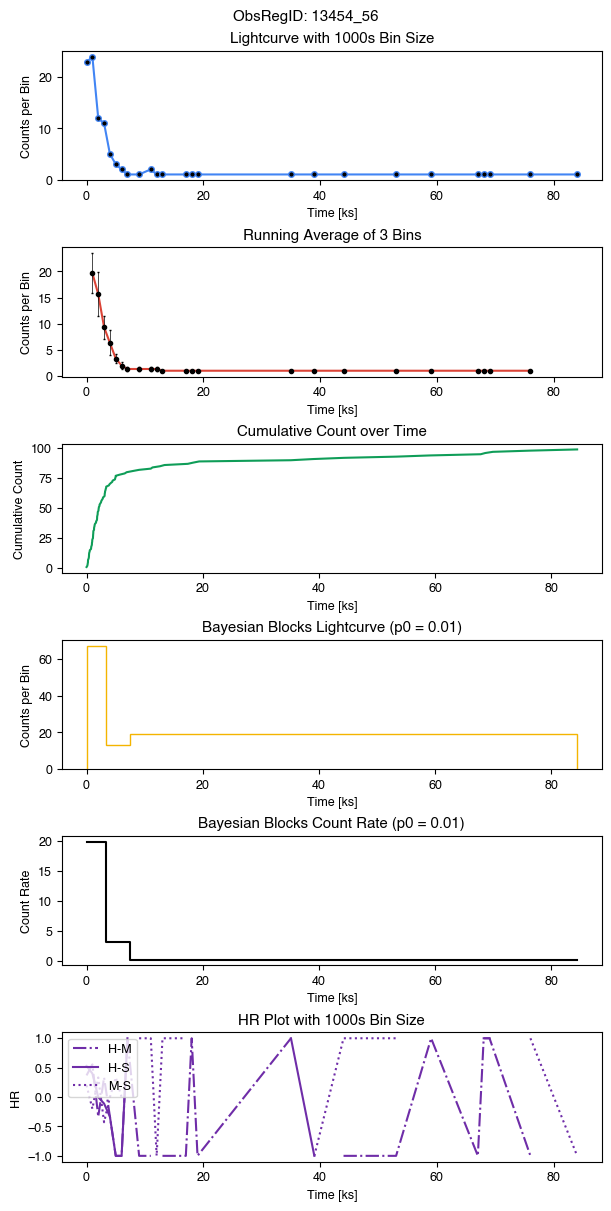

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


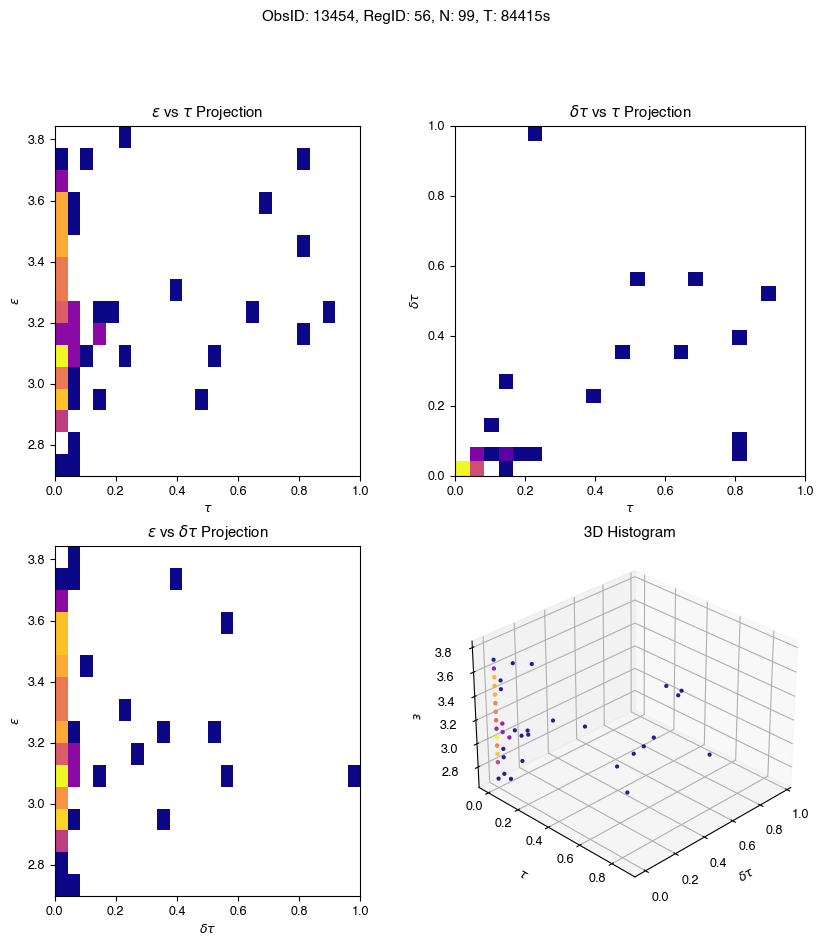

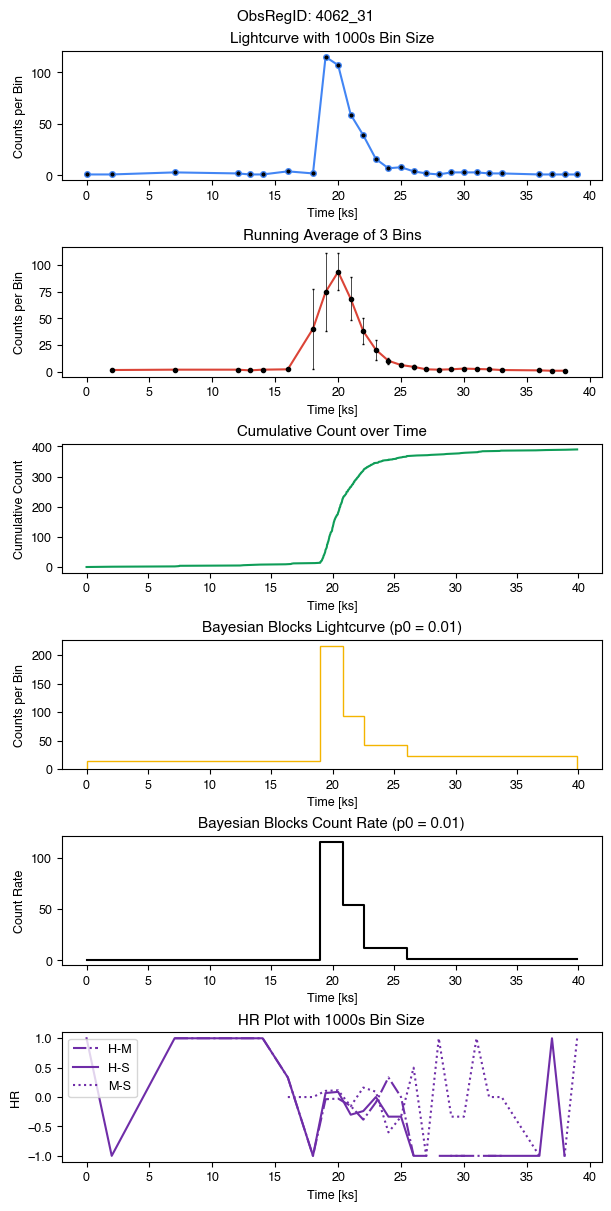

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


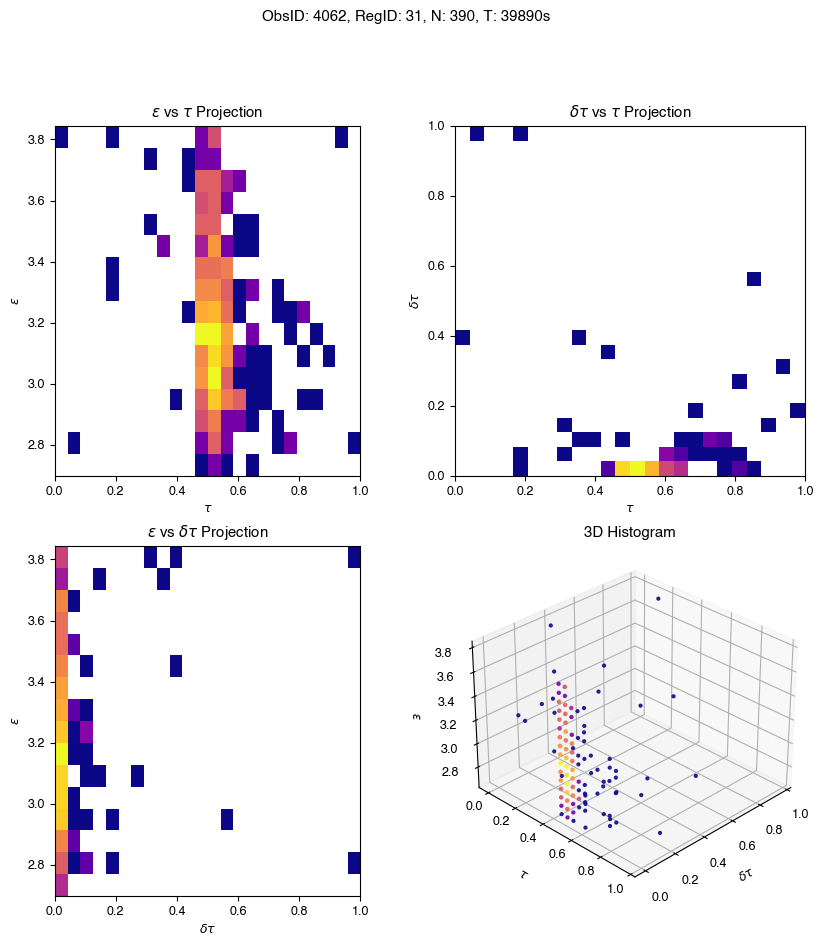

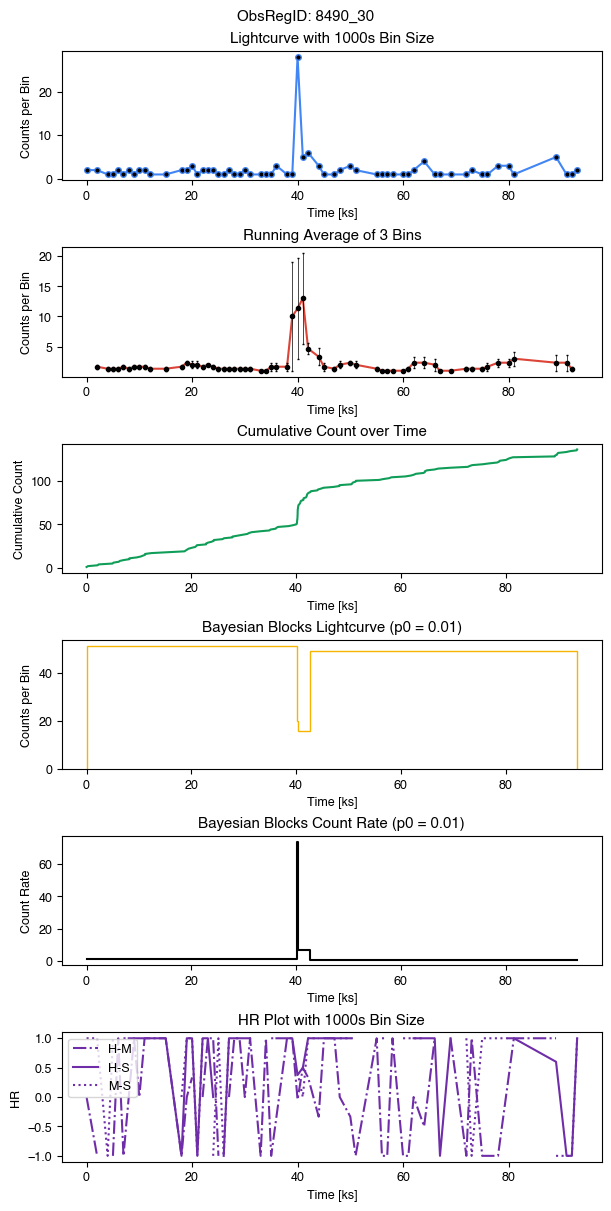

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


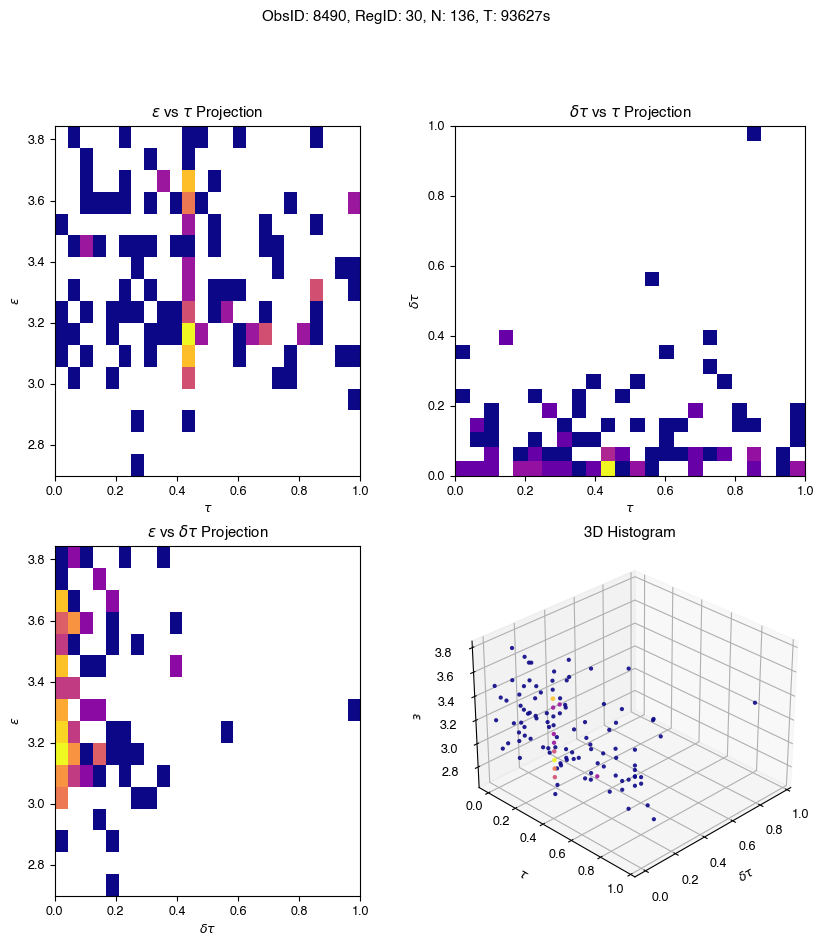

In [11]:
# Image producer
# keep = all_ids[50000:55000]
df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lightcurveplotter(dfi,id_name,1000,bb_p0=0.01)
    # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=True)
    # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=False)
    hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=True)
    #hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=False)
    # hist3Dlog(dfi,id_name,16,24,24,'minmax',True,'plasma')
    

In [62]:
df_eventfiles_group_filtered =  df_eventfiles_group.filter(lambda x: x.name in ['3926_13']).groupby('obsreg_id')
df_eventfiles_group_filtered.head(10000)

,time,energy,chipx,chipy,obsreg_id
